In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Гипотеза 4. Чем больше общее время (общее затраченное время), тем меньше ошибка.
Total_Time представляет собой общее время, проведенное в игре, предположительно в секундах. 
В колонке Black_Blunder отмечено количество грубых ошибок, допущенных черным игроком в игре. Грубый промах - это серьезная ошибка, которая значительно ухудшает позицию игрока.


In [3]:
df = pd.read_csv("final_games.csv")


In [11]:
print(df.head())

    Game_ID  Rated   Variant      Speed                        Created_At  \
0  PsevV6VH   True  standard  classical  2024-12-15T11:09:25.224000+00:00   
1  diLZa8sj   True  standard  classical  2024-10-28T13:54:16.605000+00:00   
2  O8TSZ7bq   True  standard  classical  2024-10-05T13:58:55.992000+00:00   
3  vtMjWIUv   True  standard  classical  2024-08-23T07:33:49.932000+00:00   
4  GC8I3jiq   True  standard  classical  2024-08-22T13:24:49.024000+00:00   

                       Last_Move_At Game_Status Source Winner  \
0  2024-12-15T11:55:14.775000+00:00      resign   pool  white   
1  2024-10-28T14:32:21.403000+00:00      resign   pool  white   
2  2024-10-05T14:27:57.120000+00:00      resign   pool  black   
3  2024-08-23T08:04:22.421000+00:00      resign   pool  white   
4  2024-08-22T14:18:09.814000+00:00        draw   pool    NaN   

                                        Opening_Name  ... Black_Inaccuracy  \
0             English Opening: Symmetrical Variation  ...           

In [13]:
print("Missing values in Total_Time:", df['Total_Time'].isnull().sum()) 
print("Missing values in error:", df['Black_Blunder'].isnull().sum())  

Missing values in Total_Time: 0
Missing values in error: 0


In [15]:
df = df.dropna(subset=['Total_Time', 'Black_Blunder'])

In [16]:
correlation, p_value = pearsonr(df['Total_Time'], df['Black_Blunder']) 

In [17]:
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")


Pearson correlation coefficient: -0.17
P-value: 0.000


In [ ]:
# Коэффициент корреляции Пирсона: -0,17 говорит о слабой отрицательной линейной зависимостью между Total_Time и Black_Blunder. 
# Корреляция, равная -0,17, считается довольно слабой. 
# Это говорит о том, что с увеличением Total_Time значение Black_Blunder имеет тенденцию к небольшому снижению, но связь не очень сильная.
# Поскольку значение p меньше уровня значимости (альфа = 0,05), мы отвергаеаем нулевую гипотезу. Это означает, что имеются статистически значимые доказательства того, что  корреляция существует.



In [18]:
alpha = 0.05

In [19]:
if p_value < alpha:
    print("Reject the null hypothesis.")
    if correlation < 0:  # Check the direction of the correlation
        print("There is a statistically significant negative correlation between total_time and error.")
    else:
        print("There is a statistically significant positive correlation between total_time and error.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant correlation between total_time and error.")



Reject the null hypothesis.
There is a statistically significant negative correlation between total_time and error.


In [20]:
# Отвергаем нулевую гипотезу.  Существует статистически значимая отрицательная корреляция между total_time и ошибкой.



In [9]:
if p_value < alpha:
    print("Reject the null hypothesis.")
    if correlation < 0:  # Check the direction of the correlation
        print("There is a statistically significant negative correlation between total_time and error.")
    else:
        print("There is a statistically significant positive correlation between total_time and error.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant correlation between total_time and error.")

NameError: name 'p_value' is not defined

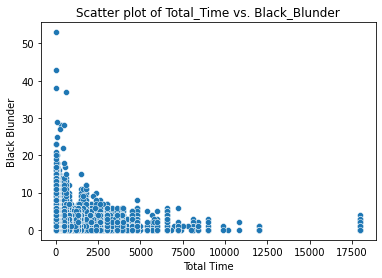

In [21]:
sns.scatterplot(x='Total_Time', y='Black_Blunder', data=df)  # Corrected. Replace "Black_Blunder" if needed.
plt.title('Scatter plot of Total_Time vs. Black_Blunder') # Corrected. Replace "Black_Blunder" if needed.
plt.xlabel('Total Time')
plt.ylabel('Black Blunder')   # Corrected. Replace "Black_Blunder" if needed.
plt.show()


In [ ]:
# Проверка с White_Blunder.


In [22]:
print("Missing values in Total_Time:", df['Total_Time'].isnull().sum())
print("Missing values in White_Blunder:", df['White_Blunder'].isnull().sum())  

Missing values in Total_Time: 0
Missing values in White_Blunder: 0


In [23]:
df = df.dropna(subset=['Total_Time', 'White_Blunder'])  

In [24]:
correlation, p_value = pearsonr(df['Total_Time'], df['White_Blunder'])  

In [25]:
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")


Pearson correlation coefficient: -0.17
P-value: 0.000


In [26]:
alpha = 0.05

In [28]:
if p_value < alpha:
    print("Reject the null hypothesis.")
    if correlation < 0:  
        print("There is a statistically significant negative correlation between total_time and error.")
    else:
        print("There is a statistically significant positive correlation between total_time and error.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant correlation between total_time and error.")


Reject the null hypothesis.
There is a statistically significant negative correlation between total_time and error.


In [ ]:
#Отвергаем нулевую гипотезу. Существует статистически значимая отрицательная корреляция между total_time и ошибкой.


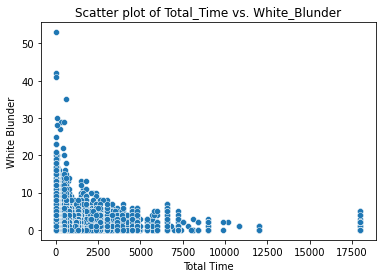

In [29]:
sns.scatterplot(x='Total_Time', y='White_Blunder', data=df)  
plt.title('Scatter plot of Total_Time vs. White_Blunder') 
plt.xlabel('Total Time')
plt.ylabel('White Blunder')  
plt.show()


In [ ]:
  # Выводы. Между Total_Time и Black_Blunder обнаружена статистически значимая (p < 0,0005), но слабая (r = -0,17) отрицательная корреляция. Это говорит о том, что существует небольшая взаимосвязь между общей длительностью игры Это говорит о том, что существует небольшая взаимосвязь между общей длительностью игры и количесвом ошибок черных. Но эта связь очень славая и, вероятно, есть другие показатели, которые больше влияют на общую продолжительность игры.
  # Между Total_Time и White_Blunder обнаружена статистически значимая (p < 0,0005), но также слабая (r = -0,17) отрицательная корреляция. Поскольку значение p меньше 0,05, мы отвергаем нулевую гипотезу и приходим к выводу, что существует статистически значимая связь между Total_Time и White_Blunder.
# Это говорит о том, что существует небольшая взаимосвязь между общей длительностью игры и количеством ошибок (в равной степени, как черных, так и белых). Но сила корреляции очень слабая, в связи с этим, возможно, стоит рассмотреть другие показатели, у которых связь сильнее. 